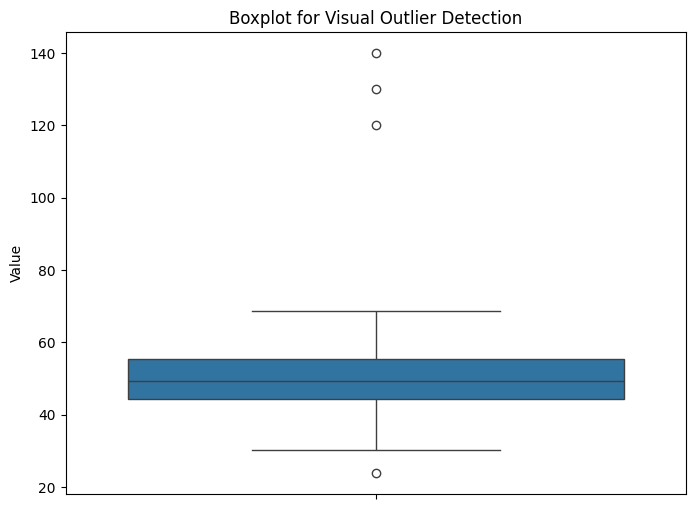

Total data points: 103
Outliers detected by Z-score: 3
Outliers detected by IQR: 4
Outliers detected by any method: 4

Combined Outliers Detected:
           Value   Z_score  Outlier_Z  Outlier_IQR  Outlier_Any
74    23.802549 -1.684398      False         True         True
100  120.000000  4.203638       True         True         True
101  130.000000  4.815716       True         True         True
102  140.000000  5.427794       True         True         True


In [8]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Step 1: Generate sample data with some outliers
np.random.seed(42)
data = np.random.normal(50, 10, 100)
outliers = np.array([120, 130, 140])
data = np.concatenate((data, outliers))
df = pd.DataFrame(data, columns=['Value'])

# Step 2: Z-score Method
df['Z_score'] = zscore(df['Value'])
z_thresh = 3
df['Outlier_Z'] = df['Z_score'].abs() > z_thresh

# Step 3: IQR Method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Outlier_IQR'] = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Step 4: Boxplot (visual confirmation)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Value'])
plt.title("Boxplot for Visual Outlier Detection")
plt.show()

# Step 5: Compare methods
df['Outlier_Any'] = df[['Outlier_Z', 'Outlier_IQR']].any(axis=1)

# Step 6: Print summary
print("Total data points:", len(df))
print("Outliers detected by Z-score:", df['Outlier_Z'].sum())
print("Outliers detected by IQR:", df['Outlier_IQR'].sum())
print("Outliers detected by any method:", df['Outlier_Any'].sum())

# Step 7: Display all detected outliers
outliers_combined = df[df['Outlier_Any']]
print("\nCombined Outliers Detected:\n", outliers_combined)